In [1]:
import numpy
import py_entropy
from matplotlib import pyplot
import os

from tqdm.notebook import tqdm

pyplot.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})

In [2]:
output_dir = "double_triple_filling"

os.makedirs(output_dir, exist_ok=True)

## Pure with both particles on boundary together

$$\rho  = \vert 0, 1 \rangle \langle 0, 1 \vert$$

In [3]:
%%time

k = 10000
ne = 1000
ls = 10*numpy.arange(1,6)

single_filename = os.path.join(output_dir, f"2_defects_left.npz")

if os.path.exists(single_filename):
    arr = numpy.load(single_filename)
    ls = arr['ls']
    pure_purities = arr['data']
    hilbert_space_sizes = arr['Ds']
else:
    all_purities = []
    hilbert_space_sizes = []
    for n in tqdm(ls):
        s = py_entropy.MultiDefectState([[0,1]], numpy.array([1.0], dtype=numpy.complex128), n, 2, num_experiments=ne)
        purities = s.apply_alternative_layers_and_save_mean_purity(k)
        D = len(s.get_enumerated_states())
        all_purities.append(purities)
        hilbert_space_sizes.append(D)
    pure_purities = numpy.array(all_purities)
    hilbert_space_sizes = numpy.array(hilbert_space_sizes)
    numpy.savez(single_filename, data=pure_purities, ls=ls, Ds=hilbert_space_sizes)

CPU times: user 2.83 ms, sys: 0 ns, total: 2.83 ms
Wall time: 6.69 ms


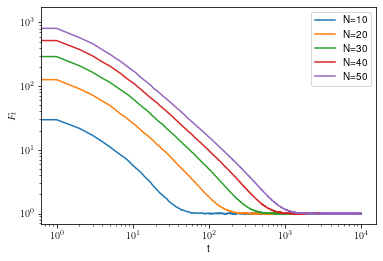

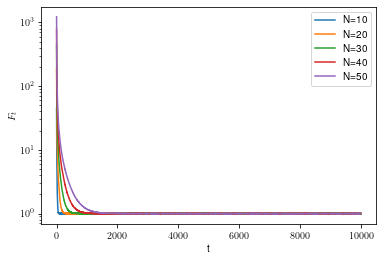

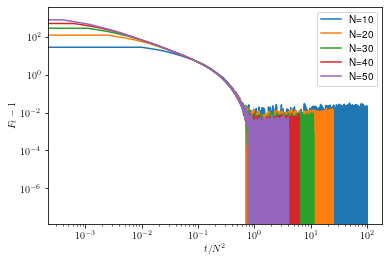

In [4]:
for n, purity in zip(ls, pure_purities):
    pyplot.plot(purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ls, pure_purities):
    pyplot.plot(purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ls, pure_purities):
    l = len(purity)
    pyplot.plot(numpy.arange(l)/(n**2), purity - 1, label=f"N={n}")
    
pyplot.xlabel('$t/N^2$')
pyplot.ylabel('$F_t - 1$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

## Pure uniformly delocalized pair

$$ \rho = \frac{1}{D}\left( \sum_{a<b} \vert a, b \rangle \right)\left( \sum_{a<b} \langle a, b \vert \right) $$

In [5]:
%%time

k = 5000
ne = 10000
ls = 5*numpy.arange(1,12)

single_filename = os.path.join(output_dir, f"2_defects_deloc.npz")

if os.path.exists(single_filename):
    arr = numpy.load(single_filename)
    ls = arr['ls']
    pure_purities = arr['data']
    initial_purities = arr['initial_purities']
    hilbert_space_sizes = arr['Ds']
else:
    all_purities = []
    hilbert_space_sizes = []
    initial_purities = []
    for n in tqdm(ls):
        input_states = []
        for i in range(n):
            for j in range(i+1,n):
                input_states.append([i,j])
        D = len(input_states)
        amplitudes = numpy.ones((len(input_states)), dtype=numpy.complex128) / numpy.sqrt(D)
        s = py_entropy.MultiDefectState(input_states, amplitudes, n, 2, num_experiments=ne, skip_float_checks=True)
        initial_purities.append(s.get_mean_purity())
        purities = s.apply_alternative_layers_and_save_mean_purity(k)
        all_purities.append(purities)
    pure_purities = numpy.array(all_purities)
    initial_purities = numpy.array(initial_purities)
    hilbert_space_sizes = numpy.array(hilbert_space_sizes)
    numpy.savez(single_filename, data=pure_purities, initial_purities=initial_purities, ls=ls, Ds=hilbert_space_sizes)

CPU times: user 0 ns, sys: 3.39 ms, total: 3.39 ms
Wall time: 4.68 ms


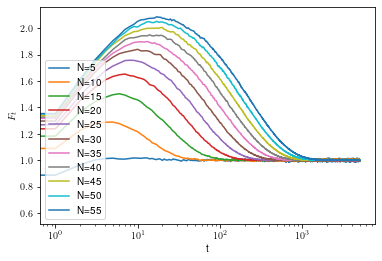

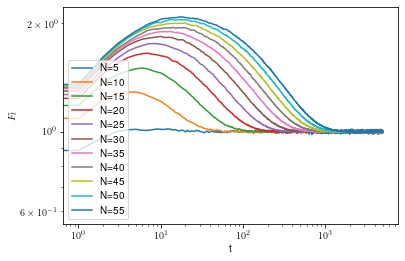

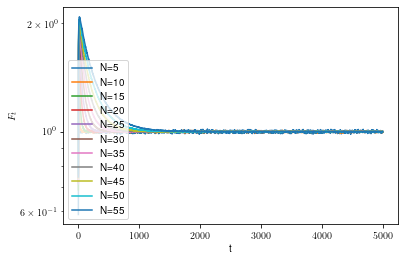

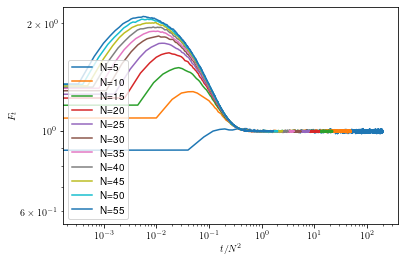

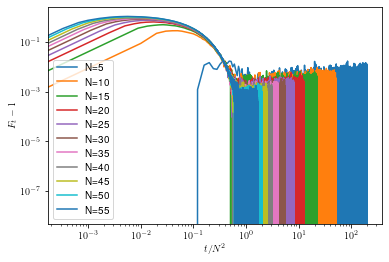

In [7]:
for n, purity in zip(ls, pure_purities):
    pyplot.plot(purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ls, pure_purities):
    pyplot.plot(purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ls, pure_purities):
    pyplot.plot(purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ls, pure_purities):
    l = len(purity)
    pyplot.plot(numpy.arange(l)/(n**2), purity, label=f"N={n}")
    
pyplot.xlabel('$t/N^2$')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.savefig(os.path.join(output_dir, "uniform_double.pdf"))
pyplot.show()

for n, purity in zip(ls, pure_purities):
    l = len(purity)
    pyplot.plot(numpy.arange(l)/(n**2), purity - 1, label=f"N={n}")
    
pyplot.xlabel('$t/N^2$')
pyplot.ylabel('$F_t - 1$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.savefig(os.path.join(output_dir, "uniform_double_offset.pdf"))
pyplot.show()

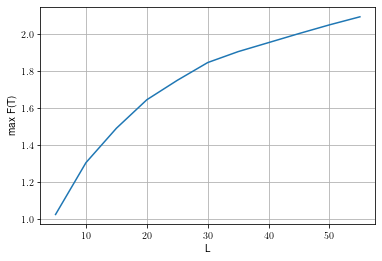

In [26]:
pyplot.plot(ls, numpy.max(pure_purities, axis=-1))
pyplot.xlabel('L')
pyplot.ylabel('max F(T)')
pyplot.grid()
pyplot.show()

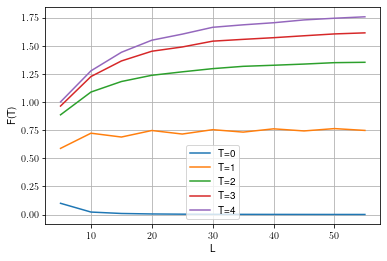

In [34]:
pyplot.plot(ls, initial_purities, label='T=0')
pyplot.plot(ls, pure_purities[:,0], label='T=1')
pyplot.plot(ls, pure_purities[:,1], label='T=2')
pyplot.plot(ls, pure_purities[:,2], label='T=3')
pyplot.plot(ls, pure_purities[:,3], label='T=4')
pyplot.xlabel('L')
pyplot.ylabel('F(T)')
pyplot.grid()
pyplot.legend()
pyplot.show()